## Import Dependancies 
    We need to leverage pandas / matplotlib / Pandas for the Final Project

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# # Bring in Data
    We are leveraging data from Kaggle online and we looked for data that could contain linear regression relationships

In [2]:
lego = pd.read_csv('Resources/lego_sets.csv')
lego.head()


,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


## Identify if we have any missing Data and Clean up data Set 

In [3]:
lego.columns[lego.isna().any()]

Index(['num_reviews', 'play_star_rating', 'prod_desc', 'review_difficulty',
       'star_rating', 'theme_name', 'val_star_rating'],
      dtype='object')

In [4]:
# fill na values
lego["num_reviews"].fillna(0, inplace=True)
lego["play_star_rating"].fillna(round(lego["play_star_rating"].mean(), 1), inplace=True)
lego["review_difficulty"].fillna("Average", inplace=True)
lego["star_rating"].fillna(round(lego["star_rating"].mean(), 1), inplace=True)
lego["val_star_rating"].fillna(round(lego["val_star_rating"].mean(), 1), inplace=True)

In [5]:
# replace text with numeric values
lego["review_difficulty"].unique()
rvdif_dict = {0: "Very Easy", 1: "Easy", 2: "Average", 3: "Challenging", 4: "Very Challenging"}
rvdif_num = [[num for num, name in rvdif_dict.items() if name==item] for item in lego["review_difficulty"]]
lego["review_difficulty_num"] = [item for sublist in rvdif_num for item in sublist]

In [6]:
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,review_difficulty_num
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,2
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US,1
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US,1
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US,2
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US,3


## Understand Correlation of Data Fields
    We need to see the correlation of the data and assess if the data set meets the need for the final bootcamp project.

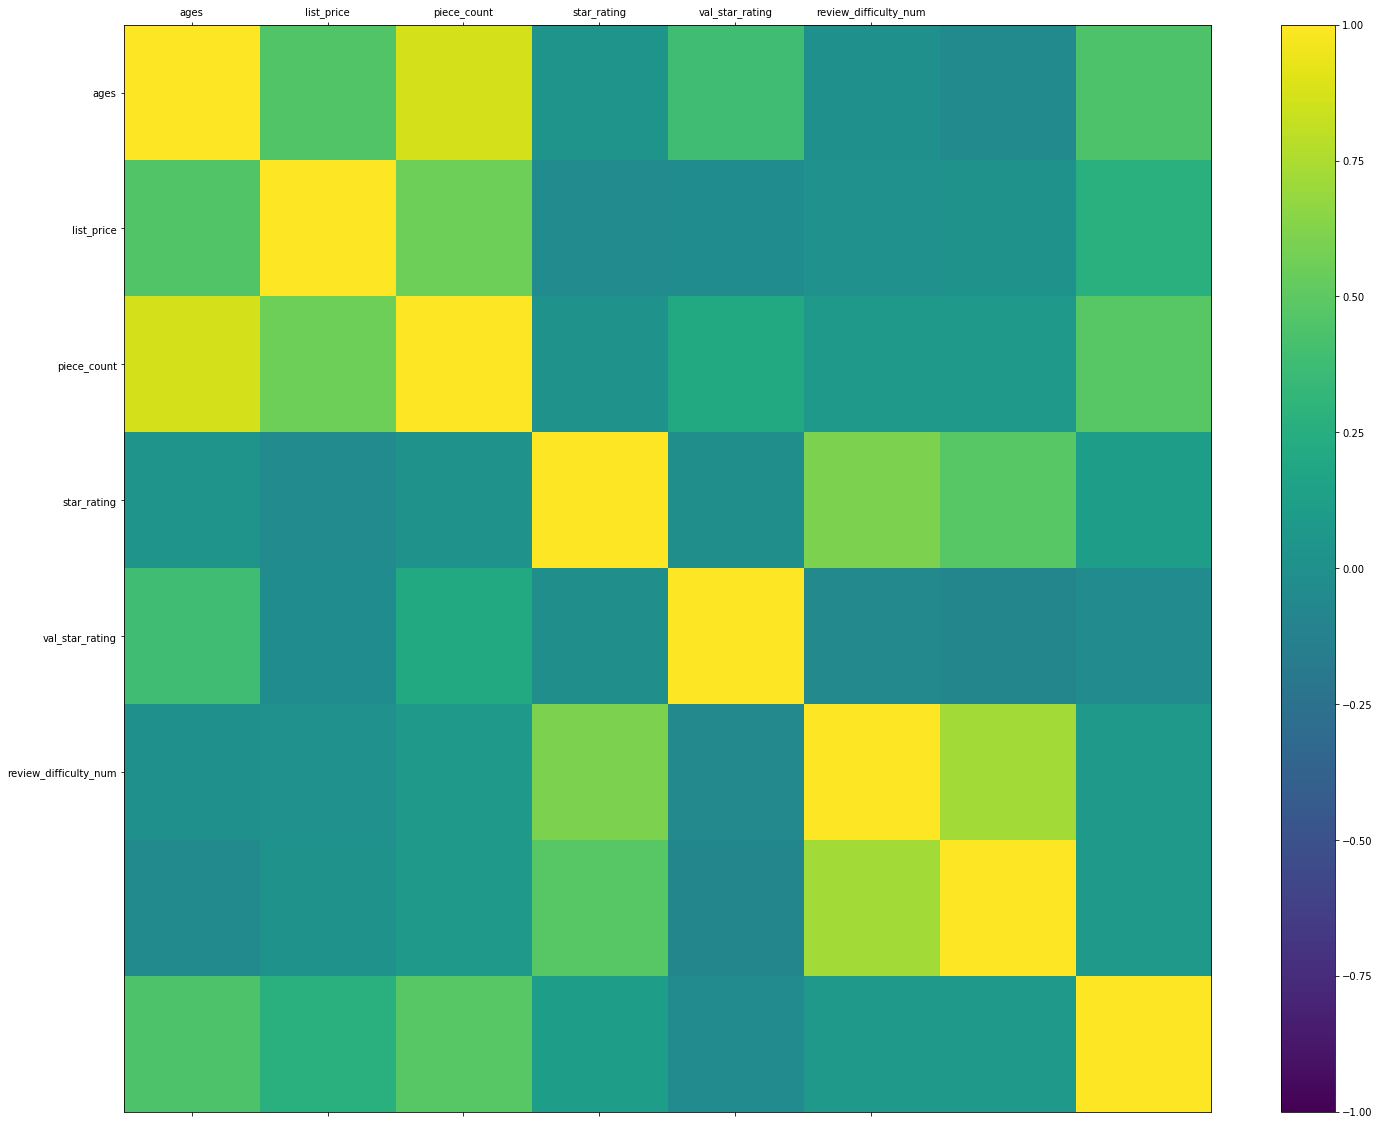

In [7]:
colnames = ["ages", "list_price", "piece_count", "star_rating", "val_star_rating","review_difficulty_num"]
corr = lego[colnames].corr()
corr=lego.corr()
# plot correlation matrix
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colnames)
ax.set_yticklabels(colnames)
plt.show()

## Do correlations create a linear relationship between fields?

In [8]:
xx = lego[["val_star_rating"]]
yy = lego["list_price"].values.reshape(-1,1)
print("Shape:", xx.shape, yy.shape)

Shape: (12261, 1) (12261, 1)


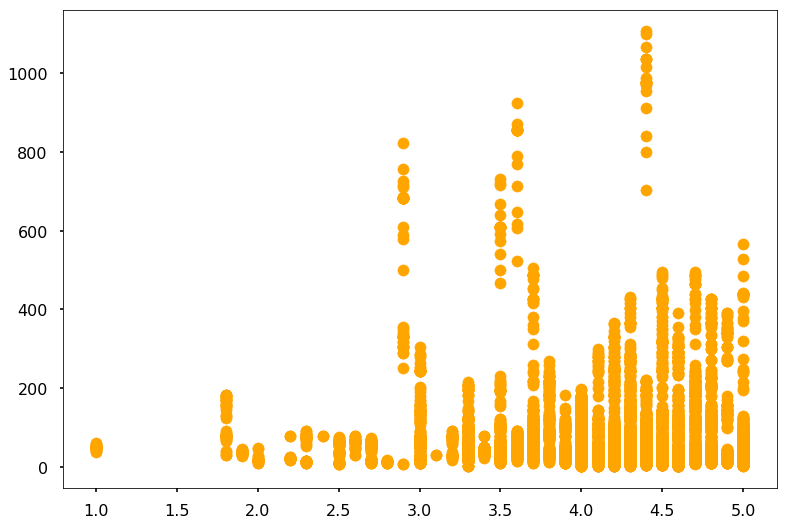

In [9]:
plt.style.use("seaborn-poster")
plt.scatter(xx,yy, c= 'orange')

In [10]:
x = lego[["piece_count"]]
y = lego["list_price"].values.reshape(-1,1)
print("Shape:", x.shape, y.shape)

Shape: (12261, 1) (12261, 1)


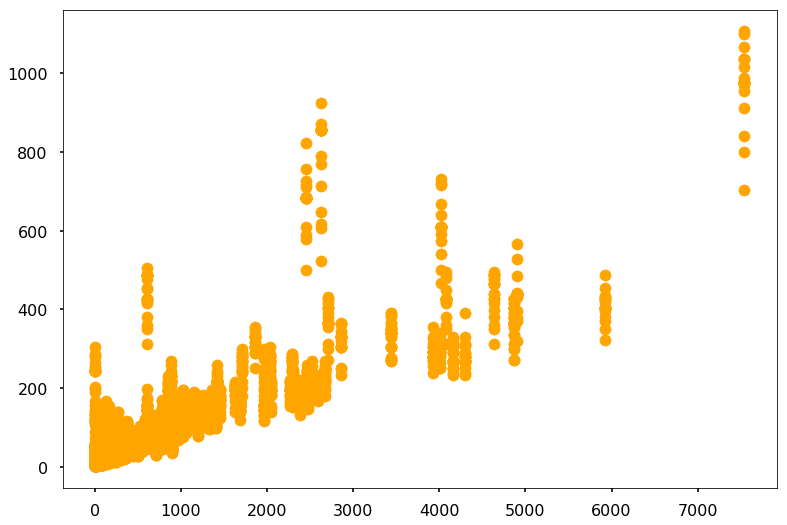

In [11]:
plt.style.use("seaborn-poster")
plt.scatter(x,y, c= 'orange')

## Analysis to confirm that linear regression is a good fit with 1 on 1 metrics

In [12]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()

In [13]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.09691346]]
y-axis intercept:  [17.32432525]


In [15]:
x_min = np.array ([x.min()])
x_max=np.array ([x.max()])
print(f"Min x Value: {x_min}")
print(f"Min x Value: {x_max}")


Min x Value: [[1.]]
Min x Value: [[7541.]]


In [16]:
#Calculate the y_min and y_max using predictive tech

y_min = model.predict(x_min)
y_max = model.predict(x_max)
y_min

array([[17.4212387]])

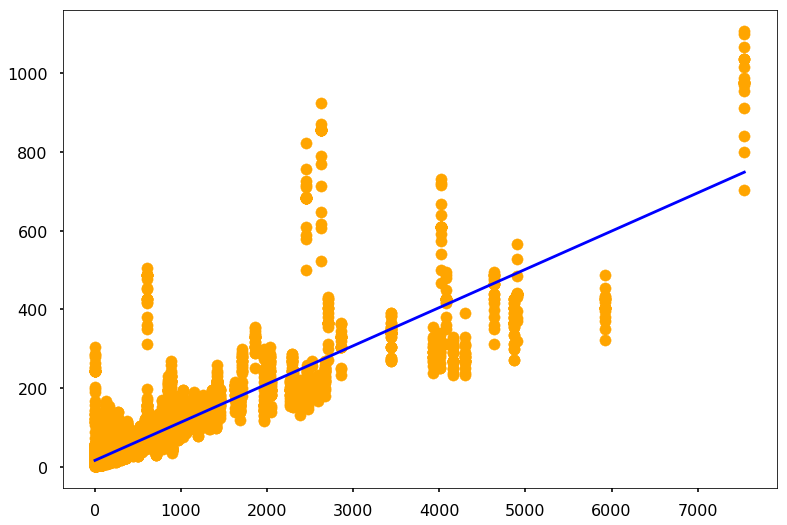

In [17]:
plt.scatter(x,y, c='orange')
plt.plot([x_min[0], x_max[0]],[y_min[0], y_max[0]], c='blue')

## Quantifying Check of 1 v 1 Metrics 

In [18]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(x)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 2062.0015980204475
R-squared (R2 ): 0.7562562125135581


## Build a Real Model using all Parameters

In [20]:
from sklearn.model_selection import train_test_split
X, Y = lego[["piece_count", "star_rating", "val_star_rating", "review_difficulty_num"]], lego["list_price"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [21]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
model.score(x_test, y_test)

0.8077617983891371

In [23]:
preds = model.predict(x_test)
preds = pd.DataFrame(preds)

In [24]:
lego['Preds'] = preds

In [25]:
lego.head(20)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,review_difficulty_num,Preds
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,2,148.987595
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US,1,26.443496
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US,1,32.140271
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US,2,41.190586
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US,3,119.083085
5,12+,59.99,7.0,597.0,3.7,Celebrate Shanghai with this LEGO® Architectur...,21039.0,Recreate Shanghai in China's blend of historic...,Average,Shanghai,4.9,Architecture,4.4,US,2,42.834471
6,12+,59.99,37.0,598.0,3.7,Celebrate New York City with this LEGO® Archit...,21028.0,Celebrate the architectural diversity of New Y...,Average,New York City,4.2,Architecture,4.1,US,2,86.919951
7,12+,49.99,24.0,780.0,4.4,Recreate Buckingham Palace with LEGO® Architec...,21029.0,Build a LEGO® brick model of London's official...,Average,Buckingham Palace,4.7,Architecture,4.3,US,2,62.221320
8,12+,39.99,23.0,468.0,3.6,Celebrate London with this LEGO® Architecture ...,21034.0,Celebrate the architectural diversity of Londo...,Average,London,4.7,Architecture,4.1,US,2,20.666699
9,12+,39.99,11.0,444.0,3.6,Celebrate Chicago with this LEGO® Architecture...,21033.0,Recreate Chicago’s blend of historical and mod...,Average,Chicago,4.8,Architecture,4.5,US,2,26.443496


In [26]:
mid = lego['list_price']
lego.drop(labels=['list_price'], axis=1,inplace = True)
lego.insert(15, 'list_price', mid)
lego

,ages,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,review_difficulty_num,Preds,list_price
0,6-12,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,2,148.987595,29.9900
1,6-12,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US,1,26.443496,19.9900
2,6-12,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US,1,32.140271,12.9900
3,12+,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US,2,41.190586,99.9900
4,12+,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US,3,119.083085,79.9900
5,12+,7.0,597.0,3.7,Celebrate Shanghai with this LEGO® Architectur...,21039.0,Recreate Shanghai in China's blend of historic...,Average,Shanghai,4.9,Architecture,4.4,US,2,42.834471,59.9900
6,12+,37.0,598.0,3.7,Celebrate New York City with this LEGO® Archit...,21028.0,Celebrate the architectural diversity of New Y...,Average,New York City,4.2,Architecture,4.1,US,2,86.919951,59.9900
7,12+,24.0,780.0,4.4,Recreate Buckingham Palace with LEGO® Architec...,21029.0,Build a LEGO® brick model of London's official...,Average,Buckingham Palace,4.7,Architecture,4.3,US,2,62.221320,49.9900
8,12+,23.0,468.0,3.6,Celebrate London with this LEGO® Architecture ...,21034.0,Celebrate the architectural diversity of Londo...,Average,London,4.7,Architecture,4.1,US,2,20.666699,39.9900
9,12+,11.0,444.0,3.6,Celebrate Chicago with this LEGO® Architecture...,21033.0,Recreate Chicago’s blend of historical and mod...,Average,Chicago,4.8,Architecture,4.5,US,2,26.443496,39.9900


In [27]:
#Subtract real price from prediction price to identify "deals"
lego['Deal'] = lego['Preds'] - lego['list_price']
lego

,ages,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,review_difficulty_num,Preds,list_price,Deal
0,6-12,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,2,148.987595,29.9900,118.997595
1,6-12,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US,1,26.443496,19.9900,6.453496
2,6-12,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US,1,32.140271,12.9900,19.150271
3,12+,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US,2,41.190586,99.9900,-58.799414
4,12+,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US,3,119.083085,79.9900,39.093085
5,12+,7.0,597.0,3.7,Celebrate Shanghai with this LEGO® Architectur...,21039.0,Recreate Shanghai in China's blend of historic...,Average,Shanghai,4.9,Architecture,4.4,US,2,42.834471,59.9900,-17.155529
6,12+,37.0,598.0,3.7,Celebrate New York City with this LEGO® Archit...,21028.0,Celebrate the architectural diversity of New Y...,Average,New York City,4.2,Architecture,4.1,US,2,86.919951,59.9900,26.929951
7,12+,24.0,780.0,4.4,Recreate Buckingham Palace with LEGO® Architec...,21029.0,Build a LEGO® brick model of London's official...,Average,Buckingham Palace,4.7,Architecture,4.3,US,2,62.221320,49.9900,12.231320
8,12+,23.0,468.0,3.6,Celebrate London with this LEGO® Architecture ...,21034.0,Celebrate the architectural diversity of Londo...,Average,London,4.7,Architecture,4.1,US,2,20.666699,39.9900,-19.323301
9,12+,11.0,444.0,3.6,Celebrate Chicago with this LEGO® Architecture...,21033.0,Recreate Chicago’s blend of historical and mod...,Average,Chicago,4.8,Architecture,4.5,US,2,26.443496,39.9900,-13.546504


## Forget Linear lets try XGBoost! 

In [28]:
import xgboost as xgb

In [29]:
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                            gamma=0,
                            learning_rate=0.1,
                            max_depth=5,
                            subsample=0.6,
                            seed=22)

In [30]:
xgb_model.fit(x_train, y_train)

/anaconda3/envs/PythonData2/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=22, silent=None,
       subsample=0.6, verbosity=1)

In [31]:
xgb_model.score(x_test, y_test)

0.9202414072482342

In [32]:
xgb_preds = xgb_model.predict(x_test)

In [33]:
y_test[:5], xgb_preds[:5]

(3375     151.9800
 11365     55.0971
 7094      18.2878
 1342      22.7924
 7378     111.9860
 Name: list_price, dtype: float64,
 array([124.561874,  29.887543,  33.553913,  32.58001 , 110.51939 ],
       dtype=float32))

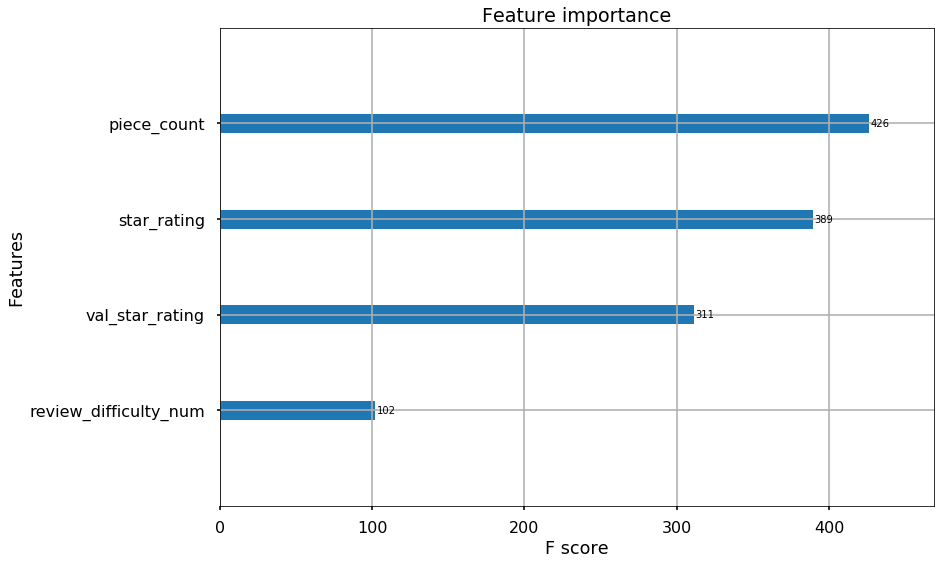

In [34]:
xgb.plot_importance(xgb_model)
plt.style.use("ggplot")
plt.show()

In [35]:
lego_preds = x_test
lego_preds["list_price"] = y_test.values
lego_preds["predicted_list_price"] = xgb_preds
lego_preds

/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,piece_count,star_rating,val_star_rating,review_difficulty_num,list_price,predicted_list_price
3375,1250.0,5.0,4.0,2,151.9800,124.561874
11365,61.0,4.5,4.2,2,55.0971,29.887543
7094,45.0,4.0,3.5,1,18.2878,33.553913
1342,139.0,4.0,3.5,1,22.7924,32.580009
7378,1077.0,4.7,4.5,2,111.9860,110.519386
8726,79.0,3.5,3.0,1,12.1878,28.079739
4771,674.0,4.7,4.2,2,109.7878,77.544792
4394,358.0,4.6,3.7,1,71.9520,59.284740
2321,1.0,4.5,4.2,2,24.3878,45.347324
1017,61.0,4.5,4.2,2,53.1924,29.887543
